In [1]:
def plotModels(models):
    %matplotlib notebook
    tMods=copy.deepcopy(models)
    [modelToListForm(mod) for mod in tMods]
    paretoModels=paretoTournament(tMods)
    for i in paretoModels:
        tMods.remove(i)
    [modelRestoreForm(mod) for mod in paretoModels]
    [modelRestoreForm(mod) for mod in tMods]
    
    pAccuracies=[mod[2][0] for mod in paretoModels]
    pComplexities=[mod[2][1] for mod in paretoModels]
    
    accuracies=[mod[2][0] for mod in tMods]+pAccuracies
    complexities=[mod[2][1] for mod in tMods]+pComplexities
    colors=['blue' for i in range(len(tMods))]+['red' for i in range(len(pAccuracies))]
    
    fig,ax = plt.subplots()

    sc=plt.scatter(complexities,accuracies,color=colors)
    plt.xlabel("Complexity")
    plt.ylabel("1-R**2")
    names=[str(printGPModel(mod)) for mod in tMods]+[str(printGPModel(mod)) for mod in paretoModels]
    
    label = ax.annotate("", xy=(0,0), xytext=(np.min(complexities),np.mean([np.max(accuracies),np.min(accuracies)])),
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    label.set_visible(False)
    
    def update_labels(ind):

        pos = sc.get_offsets()[ind["ind"][0]]
        label.xy = pos
        text = "{}".format(" ".join([names[n] for n in [ind["ind"][0]]]))
        label.set_text(text)
        label.get_bbox_patch().set_facecolor('grey')
        label.get_bbox_patch().set_alpha(0.9)


    def hover(event):
        vis = label.get_visible()
        if event.inaxes == ax:
            cont, ind = sc.contains(event)
            if cont:
                update_labels(ind)
                label.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    label.set_visible(False)
                    fig.canvas.draw_idle()

    fig.canvas.mpl_connect("motion_notify_event", hover)

    plt.show()

In [2]:
from StackGPPython import *
def plotModelResponseComparison(model,inputData,response,sort=False):
    plt.scatter(range(len(response)),response,label="True Response")
    plt.scatter(range(len(response)),evaluateGPModel(model,inputData),label="Model Prediction")
    plt.legend()
    plt.xlabel("Data Index")
    plt.ylabel("Response Value")
    plt.show()
def plotPredictionResponseCorrelation(model,inputData,response):
    plt.scatter(response,evaluateGPModel(model,inputData),label="Model")
    plt.plot(response,response,label="Perfect Correlation",color='green')
    plt.xlabel("True Response")
    plt.ylabel("Predicted Response")
    plt.legend()
    plt.show()

In [3]:
models=evolve([[1,2,3]],[3,4,5])

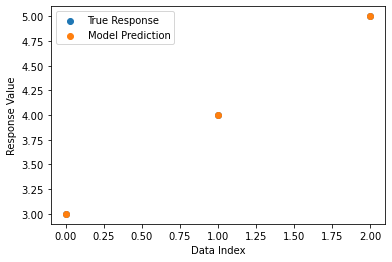

In [4]:
plotModelResponseComparison(models[1],[[1,2,3]],[3,4,5])

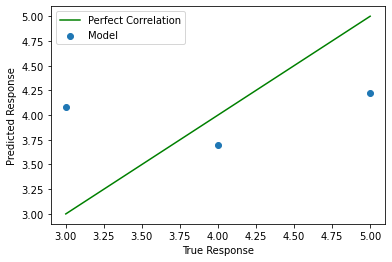

In [5]:
plotPredictionResponseCorrelation(models[-1],[[1,2,3]],[3,4,5])

<IPython.core.display.Javascript object>


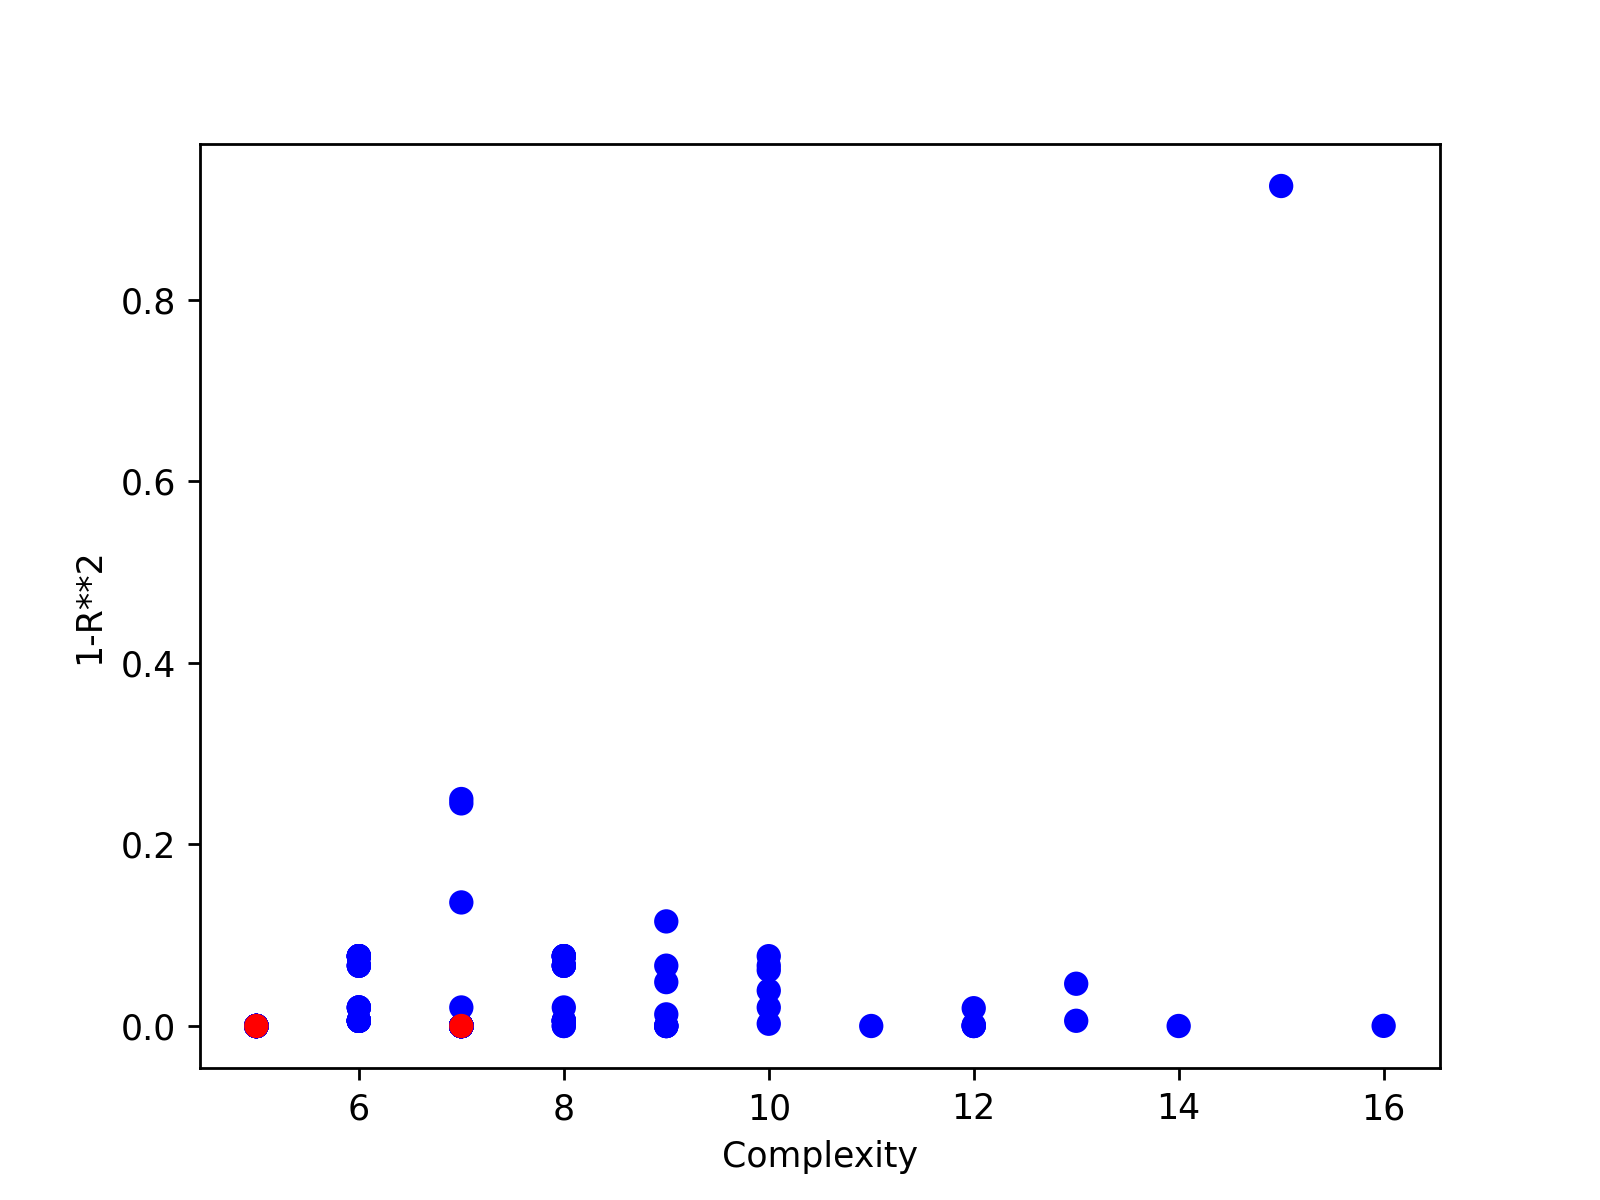

In [6]:
plotModels(models)